In [ ]:
%run ./rob_setup_notebook.ipynb

### Add or check attributes in all exp_obj pkl files

In [ ]:
pkl_files = os.listdir(pkl_folder)

for i,pkl in enumerate(pkl_files):
    if '.pkl' in pkl:
        
        pkl_path = os.path.join(pkl_folder, pkl)

        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
#         pkl_list = [exp_obj.photostim_r, exp_obj.photostim_s]

#         if exp_obj.spont.n_frames > 0:
#             pkl_list.append(exp_obj.spont)

#         if exp_obj.whisker_stim.n_frames > 0:
#             pkl_list.append(exp_obj.whisker_stim)
        
#         for sub_obj in pkl_list:

### Play with data from individual experimental objects

In [ ]:
# '2019-06-11_J048',
# '2019-06-13_J052',
# '2019-06-25_RL048',
# '2019-07-15_RL052',
# '2019-08-14_J058',
# '2019-08-14_J059',
# '2019-08-15_RL055',
# '2019-11-14_J061',
# '2019-11-14_J063',
# '2019-11-15_J064',
# '2019-11-18_J065',
# '2020-02-27_RL075'

pkl_path = os.path.join(pkl_folder, '2020-02-27_RL075.pkl')

with open(pkl_path, 'rb') as f:
    exp_obj = pickle.load(f)

# with open(pkl_path, 'wb') as f:
#     pickle.dump(exp_obj, f)

### Show all attributes in exp_obj or sub_objs

In [ ]:
# Show all attributes in exp_obj or sub_objs

# for key, value in vars(exp_obj).items():
#     print(key)

for key, value in vars(exp_obj.photostim_s).items():
    print(key)

### Play with whisker stim data

In [ ]:
# Calculate the number of cells that responded both to whisker stim and photostim

a = np.where(exp_obj.whisker_stim.sta_sig[0])
b = np.where(exp_obj.photostim_r.sta_sig[0])
print(a,b)
sum(1 for i in b[0] if i in a[0])

# Plot whisker stim trials where cells went over 200 dFF

# plt.figure(figsize=(5,10))
# sta_mean = []

# for i, sta in enumerate(exp_obj.whisker_stim.stas[0]):
#     if exp_obj.whisker_stim.sta_sig[0][i]:
#         plt.plot(sta, alpha=0.2)
#         sta_mean.append(sta)
    
#         if exp_obj.whisker_stim.sta_amplitudes[0][i] > 200:
#             print(exp_obj.whisker_stim.cell_id[0][i])
            
# sta_mean = np.mean(sta_mean, axis=0)

# plt.plot(sta_mean, 'k', linewidth=2)

# plt.axis([0, 55, -10, 300])

IndexError: index out of range

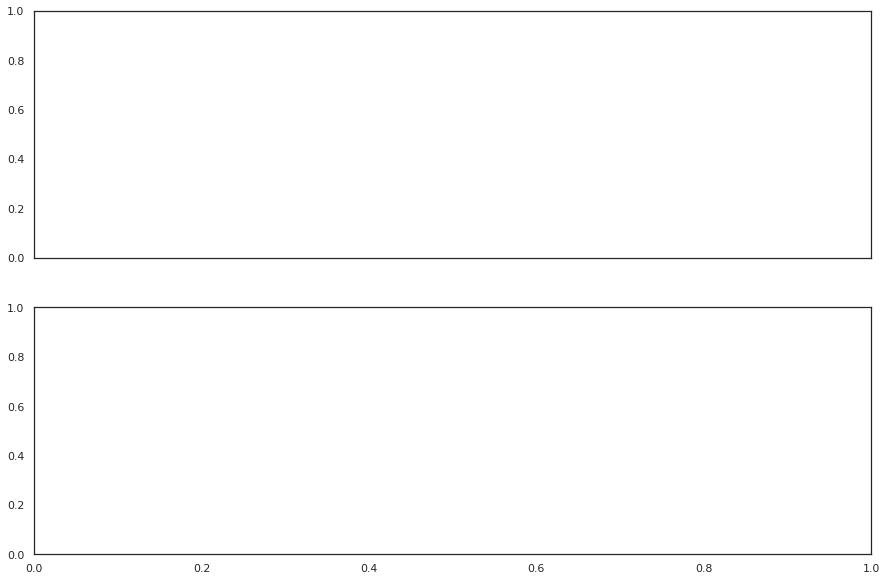

In [3]:
legend = True

pkl_list = [
#             '2019-06-11_J048.pkl',
#             '2019-06-13_J052.pkl',
#             '2019-06-25_RL048.pkl',
#             '2019-07-15_RL052.pkl',
#             '2019-08-14_J058.pkl',
#             '2019-08-14_J059.pkl',
#             '2019-08-15_RL055.pkl',
#             '2019-11-14_J061.pkl',
#             '2019-11-14_J063.pkl',
#             '2019-11-15_J064.pkl',
#             '2019-11-18_J065.pkl',
#             '2020-02-27_RL075.pkl',
            '2020-03-03_RL074.pkl',
#             '2020-03-05_RL070.pkl',
#             '2020-03-05_RL072.pkl',
#             '2020-03-12_RL070.pkl',
#             '2020-03-16_RL074.pkl',
#             '2020-03-19_RL075.pkl',
#             '2020-03-20_RL080.pkl'
           ]

for i,pkl in enumerate(pkl_list):
    pkl_list[i] = os.path.join(qnap_path, 'pkl_files', pkl)

if not pkl_list:
    pkl_list = self.pkl_path

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)
labels = []

raw_f_frame = np.empty([len(pkl_list), 8])
norm_f_frame = np.empty([len(pkl_list), 8])

for i,pkl_file in enumerate(pkl_list):

    with open(pkl_file, 'rb') as f:
        exp_obj = pickle.load(f)
        
    obj_list = []
    
    if exp_obj.whisker_stim.n_frames > 0:
        obj_list.append(exp_obj.whisker_stim)
        
    if exp_obj.spont.n_frames > 0:
        obj_list.append(exp_obj.spont)

    obj_list.extend([exp_obj.photostim_r, exp_obj.photostim_s])
        
    size_y = exp_obj.photostim_r.frame_y
    size_x = exp_obj.photostim_r.frame_x
    drift_stack = np.empty([0, size_y, size_x])

    for j,sub_obj in enumerate(obj_list):

        tiff_path = sub_obj.tiff_path

        file_list = os.listdir(tiff_path)
        for file in file_list:
            if '.tif' in file:
                tiff_file = os.path.join(tiff_path, file)

        total_frames = range(0,sub_obj.n_frames) #get the range of frames for this experiment
        start_frames = total_frames[30:1000] # get 970 frames after start
        end_frames = total_frames[-1000:-30] # get 970 frames before end

        stack_start = tf.imread(tiff_file, key=start_frames)
        stack_end = tf.imread(tiff_file, key=end_frames)

        mean_start = np.mean(stack_start, axis=0)
        mean_end = np.mean(stack_end, axis=0)

        drift_stack = np.append(drift_stack, [mean_start, mean_end], axis=0)
                
#         save_path = os.path.join(qnap_path, 'Analysis', 'Drift_check', tiff_path.split('/')[-1])
#         tf.imwrite(save_path + '_drift_stack.tif', drift_stack.astype('int16'))
    
    raw_f = np.mean(drift_stack, axis=(1,2))
    norm_f = raw_f/raw_f[0]
    raw_f_frame[i][:len(raw_f)] = raw_f
    norm_f_frame[i][:len(norm_f)] = norm_f

    ax[0].plot(raw_f)
    ax[1].plot(norm_f)
    labels.append(pkl[:-4])               

plt.xlabel('experiments');
plt.xticks(range(0,8), np.tile(np.array(['start','end']), 4));
ax[0].set_ylabel('raw_f');
ax[1].set_ylabel('norm_f');
ax[1].set_ylim([0.6, 1.2]);       

if legend:
    plt.legend(labels);